# LSTM

## Import

In [1]:
import sys
import os
from pathlib import Path
import pandas as pd

# 获取项目根目录的路径
project_root = Path(os.getcwd()).resolve().parent
print("项目根目录：", project_root)
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

print("当前工作目录：", os.getcwd())
print("当前的 Python 路径：")
print(sys.path)

# Step 2: 导入函数
from src.data_preprocessing import (
    generate_synthetic_data,
    preprocess_data,
    prepare_lstm_data,
)
from src.lstm_model import train_lstm, evaluate_model, get_scaler

项目根目录： D:\pycharm_workplace\Pattern-Recognition
当前工作目录： d:\pycharm_workplace\Pattern-Recognition\notebooks
当前的 Python 路径：
['d:\\Anaconda3\\python312.zip', 'd:\\Anaconda3\\DLLs', 'd:\\Anaconda3\\Lib', 'd:\\Anaconda3', '', 'd:\\Anaconda3\\Lib\\site-packages', 'd:\\Anaconda3\\Lib\\site-packages\\win32', 'd:\\Anaconda3\\Lib\\site-packages\\win32\\lib', 'd:\\Anaconda3\\Lib\\site-packages\\Pythonwin', 'd:\\Anaconda3\\Lib\\site-packages\\setuptools\\_vendor', 'D:\\pycharm_workplace\\Pattern-Recognition']


## Data Preprocessing

In [2]:
# 生成合成数据
df_raw = generate_synthetic_data(num_contents=50, time_span=72) 
df_processed, high_freq_contents = preprocess_data(df_raw, cache_size=10)

# 准备LSTM数据
sequence_length = 2  # 时间序列长度
X, y, scaler = prepare_lstm_data(df_processed, sequence_length=sequence_length)

# 划分训练集、验证集和测试集
# 按时间顺序划分
total_samples = X.shape[0]
train_size = int(0.7 * total_samples)
val_size = int(0.15 * total_samples)
test_size = total_samples - train_size - val_size

X_train, X_val, X_test = (
    X[:train_size],
    X[train_size : train_size + val_size],
    X[train_size + val_size :],
)
y_train, y_val, y_test = (
    y[:train_size],
    y[train_size : train_size + val_size],
    y[train_size + val_size :],
)

print(f"训练集样本数量：{X_train.shape[0]}")
print(f"验证集样本数量：{X_val.shape[0]}")
print(f"测试集样本数量：{X_test.shape[0]}")

合成数据已保存到 D:\pycharm_workplace\Pattern-Recognition\data\raw
预处理后的数据已保存到 D:\pycharm_workplace\Pattern-Recognition\data\processed
高频内容已保存到 D:\pycharm_workplace\Pattern-Recognition\data\processed\high_freq_contents\high_freq_contents.csv
lstm数据
content_id            1    2   3   4   5   6   7   8   9   12
timestamp                                                    
2024-12-01 00:00:00  213  114  64  46  56  40  34  27  23  17
2024-12-01 01:00:00  231  120  72  48  35  44  25  31  27  17
2024-12-01 02:00:00  226  127  79  54  37  28  31  36  22  16
2024-12-01 03:00:00  184  125  74  67  41  32  43  26  23  24
2024-12-01 04:00:00  233  100  88  44  54  39  29  35  26  19
Scaler 已保存到 D:\pycharm_workplace\Pattern-Recognition\data\processed\scaler.pkl
LSTM 输入数据形状：X=(70, 2, 10), y=(70, 10)
训练集样本数量：49
验证集样本数量：10
测试集样本数量：11


## Training & Validation

In [3]:
epochs = 100  
batch_size = 16
learning_rate = 0.001
patience = 20  # 早停耐心值

model, train_losses, val_losses = train_lstm(
    X_train,
    y_train,
    X_val,
    y_val,
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=learning_rate,
    patience=patience,
)

# 评估模型
predictions_integer, y_test_integer, mse, mae = evaluate_model(
    model, X_test, y_test, scaler, batch_size
)

# 查看前10个预测结果
print("前10个预测结果（整数）：", predictions_integer[:10])
print("前10个实际值（整数）：", y_test_integer[:10])

d:\Anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/100], Train Loss: 0.9709, Val Loss: 0.9548
最佳模型已保存到 D:\pycharm_workplace\Pattern-Recognition\outputs\models\best_lstm_model.pth
Epoch [2/100], Train Loss: 0.9437, Val Loss: 0.9549
验证损失未改善，触发次数: 1/20
Epoch [3/100], Train Loss: 1.3365, Val Loss: 0.9548
验证损失未改善，触发次数: 2/20
Epoch [4/100], Train Loss: 1.0586, Val Loss: 0.9546
最佳模型已保存到 D:\pycharm_workplace\Pattern-Recognition\outputs\models\best_lstm_model.pth
Epoch [5/100], Train Loss: 0.8905, Val Loss: 0.9543
最佳模型已保存到 D:\pycharm_workplace\Pattern-Recognition\outputs\models\best_lstm_model.pth
Epoch [6/100], Train Loss: 0.9809, Val Loss: 0.9545
验证损失未改善，触发次数: 1/20
Epoch [7/100], Train Loss: 1.0352, Val Loss: 0.9541
最佳模型已保存到 D:\pycharm_workplace\Pattern-Recognition\outputs\models\best_lstm_model.pth
Epoch [8/100], Train Loss: 0.9188, Val Loss: 0.9538
最佳模型已保存到 D:\pycharm_workplace\Pattern-Recognition\outputs\models\best_lstm_model.pth
Epoch [9/100], Train Loss: 0.9142, Val Loss: 0.9541
验证损失未改善，触发次数: 1/20
Epoch [10/100], Train Loss: 1.0

D:\pycharm_workplace\Pattern-Recognition\src\lstm_model.py:188: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


ValueError: could not broadcast input array from shape (110,) into shape (11,)

## Visualization

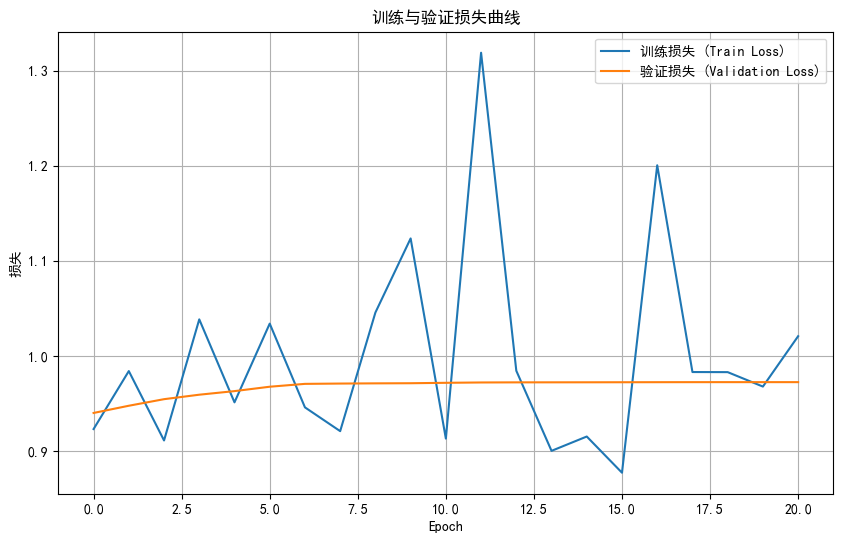

 y_test_original: 
[[245. 104.  75.  58.  25.  39.  33.  27.  20.  24.]
 [206. 123.  69.  51.  35.  33.  34.  27.  22.  20.]
 [226. 105.  77.  65.  34.  38.  29.  36.  31.  17.]
 [203. 109.  78.  51.  48.  58.  25.  18.  27.  16.]
 [231. 125.  67.  50.  35.  29.  31.  33.  28.  16.]
 [236. 117.  65.  45.  36.  35.  31.  22.  20.  23.]
 [201.  98.  91.  52.  45.  30.  38.  29.  28.  21.]
 [222. 119.  71.  55.  53.  39.  36.  28.  18.  20.]
 [236. 103.  64.  63.  45.  51.  28.  37.  22.  18.]
 [211.  90.  83.  56.  44.  48.  30.  30.  30.  26.]
 [227. 131.  65.  58.  39.  39.  25.  23.  20.  18.]]
predictions_integer: 
 [[221 111  73  55  42  37  31  29  24  19]
 [221 111  73  55  42  37  31  29  24  19]
 [221 111  73  55  42  37  31  29  24  19]
 [221 111  73  55  42  37  31  29  24  19]
 [221 111  73  55  42  37  31  29  24  19]
 [221 111  73  55  42  37  31  29  24  19]
 [221 111  73  55  42  37  31  29  24  19]
 [221 111  73  55  42  37  31  29  24  19]
 [221 111  73  55  42  37  31 

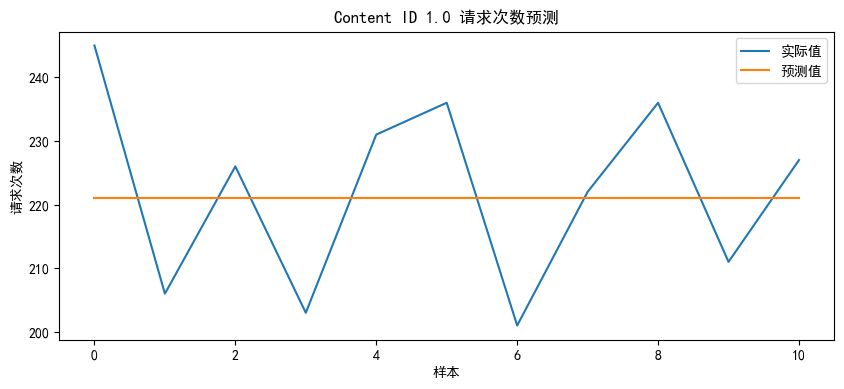

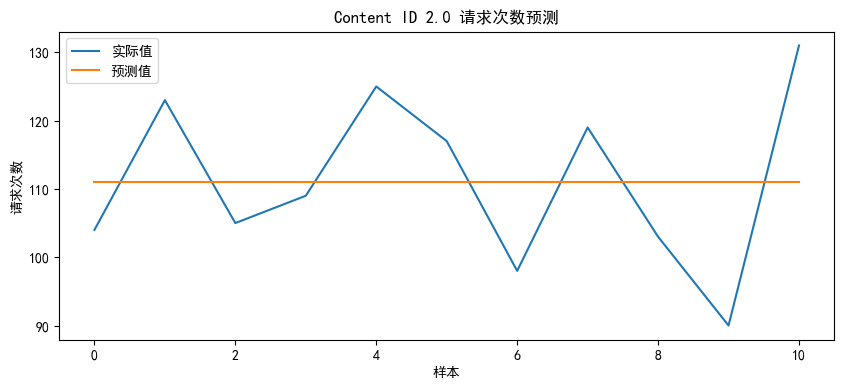

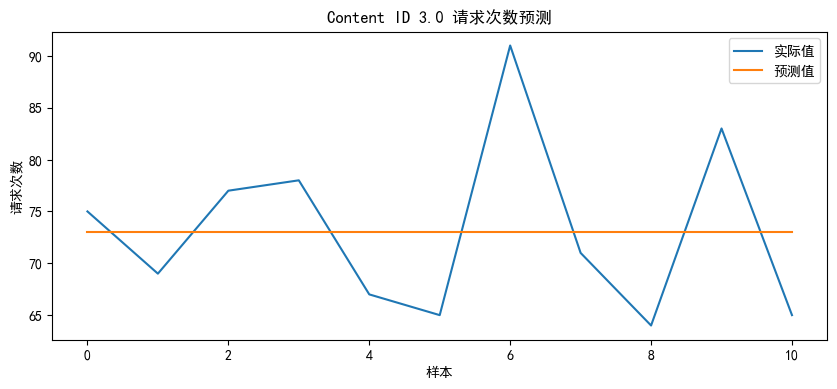

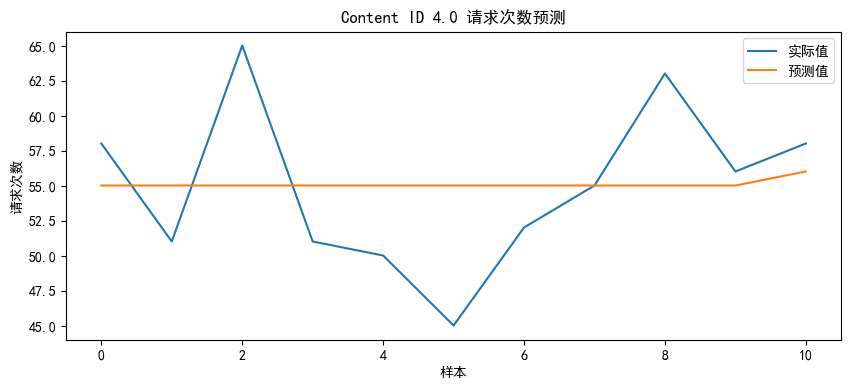

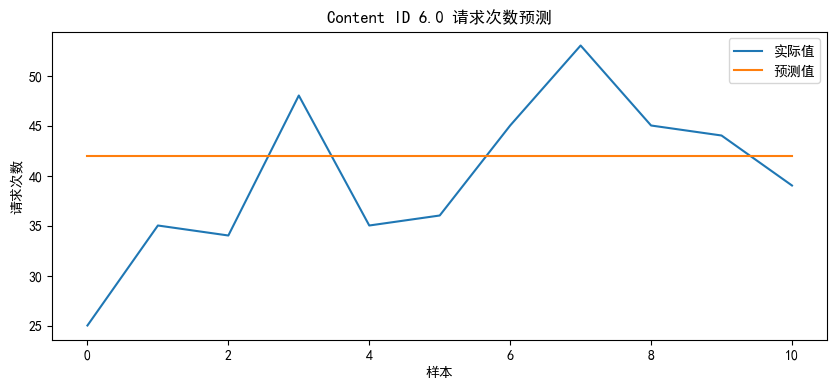

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# 设置全局中文字体
matplotlib.rcParams["font.sans-serif"] = ["SimHei"]
matplotlib.rcParams["axes.unicode_minus"] = False

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="训练损失 (Train Loss)")
plt.plot(val_losses, label="验证损失 (Validation Loss)")
plt.title("训练与验证损失曲线")
plt.xlabel("Epoch")
plt.ylabel("损失")
plt.legend()
plt.grid(True)
plt.show()

# 可视化预测结果, 选择前5个内容进行可视化
num_visualize = 5
y_test_original = scaler.inverse_transform(y_test)

print(" y_test_original: ")
print(y_test_original)

# 将预测结果四舍五入为整数并确保非负
predictions_integer = np.round(predictions_original).astype(int)
predictions_integer = np.maximum(predictions_integer, 0)

print("predictions_integer: \n", predictions_integer)

# 可选：查看前10个预测结果
print("前10个预测结果（整数）：\n", predictions_integer[:10].flatten())
print("前10个实际值（整数）：\n", y_test_original[:10].flatten().astype(int))

for i in range(min(num_visualize, predictions_integer.shape[1])):
    plt.figure(figsize=(10, 4))
    plt.plot(y_test_original[:, i], label="实际值")
    plt.plot(predictions_integer[:, i], label="预测值")
    plt.title(f'Content ID {high_freq_contents.iloc[i]["content_id"]} 请求次数预测')
    plt.xlabel("样本")
    plt.ylabel("请求次数")
    plt.legend()
    plt.show()